# Spectral calculations on Multi Axis data

In this notebook, we check that functions of _spectral are working as expected.

## Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import chirp
from caits import visualization as vis
from caits.fe import (
    spectral_std,
    spectral_spread,
    spectral_values,
    spectral_bandwidth,
    spectral_centroid,
    spectral_decrease,
    spectral_flatness,
    spectral_kurtosis,
    spectral_skewness,
    spectral_slope,
    spectral_rolloff,
    underlying_spectral,
    power_spectral_density
)


## Step 2: Initialize data

In [2]:
# Parameters
fs = 200  # Sample rate (Hz)
duration = 2  # seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
n_samples = len(t)

# Signals
sine_5hz = np.sin(2 * np.pi * 5 * t)
sine_40hz = np.sin(2 * np.pi * 40 * t)
noise = np.random.randn(n_samples)
chirp_5_50 = chirp(t, f0=5, f1=50, t1=duration, method='linear')
constant = np.ones_like(t)
two_tone = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 40 * t)
decay_sine = (1 - t / duration) * np.sin(2 * np.pi * 5 * t)
impulse = np.zeros_like(t)
impulse[10] = 1  # single spike

# Stack into (samples, signals)
data = np.stack([
    sine_5hz,
    sine_40hz,
    noise,
    chirp_5_50,
    constant,
    two_tone,
    decay_sine,
    impulse
], axis=-1)

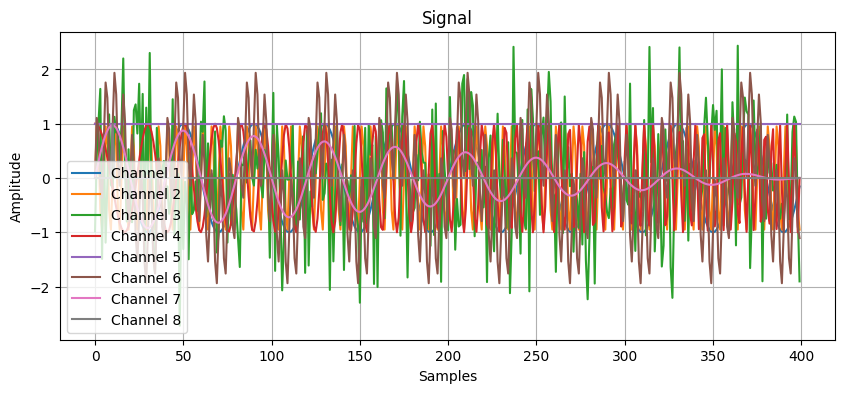

In [3]:
fig = vis.plot_signal(data, sr=n_samples)

## Step 3: Check underlying spectral

In [4]:
underspec = underlying_spectral(data, fs=n_samples)
print(underspec[0].shape, underspec[1].shape, underspec[2].shape)
underspec[1]


(201, 8) (201,) (8,)


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [5]:
N = 0
underspec_1d = underlying_spectral(data[:, N], fs=n_samples)
np.sum(underspec_1d[0] - underspec[0][:, N]), underspec_1d[2] - underspec[2][N]

(0.0, 0.0)

## Check spectral centroid

In [6]:
data_centroid = spectral_centroid(data, fs=n_samples)
data_centroid, data_centroid.shape

(array([ 10.        ,  80.        , 101.13179506,  56.85427997,
          0.        ,  45.        ,  14.07487792, 100.        ]),
 (8,))

In [8]:
data_centroid_1d = spectral_centroid(data[:, 0], fs=n_samples)
data_centroid_1d

10.000000000002292